compiled with Julia 1.8.5

Exercise 1

(a)

In [3]:
using Random

n = 100000

rng = RandomDevice()
@time random_numbers = rand(rng,Float64,n);

  0.045756 seconds (57.05 k allocations: 3.893 MiB, 30.60% compilation time)


(b)

In [4]:
# Calculates average value of array X
function mean(X::Array{Float64})::Float64
    return sum(X)/length(X)
end

# Calculates variance of array X
function VAR(X::Array{Float64})::Float64
    return X'*X-mean(X)^2
end

# Calculates error of the mean of array X
function ERR(X::Array{Float64})::Float64
    return sqrt(VAR(X)/length(X))
end

ERR (generic function with 1 method)

(c)

Mean: 0.49780956536945675
Variance: 33124.12594405408
Error of the mean: 0.5755356282981453


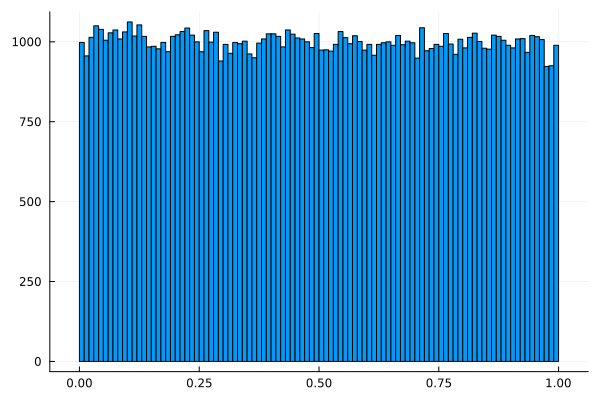

In [5]:
using Plots

println("Mean: ", mean(random_numbers))
println("Variance: ", VAR(random_numbers))
println("Error of the mean: ", ERR(random_numbers))
histogram(random_numbers, legend=:false, bins=100)

(d)

COMPILE AT OWN RISK

In [ ]:
rng_x = RandomDevice()
rng_y = RandomDevice()
x = rand(rng_x,Float64,n)
y = rand(rng_y,Float64,n)

scatter([xy for xy in zip(x,y)],ms=2,legend=:false)

(e)

In [6]:
# Calculates random numbers between 0 and 1
function congr_random_number_generator(seed)::Float64
    a = 1664525
    c = 1013904223
    m = 2^32
    
    return mod(a*seed+c,m)/m
end

congr_random_number_generator (generic function with 1 method)

In [7]:
selfmade_random = Array{Float64}(undef, n)

@time for i in 1:n
    selfmade_random[i] = congr_random_number_generator(rand(Int))
end

  0.020366 seconds (399.00 k allocations: 7.615 MiB, 12.42% compilation time)


Mean: 0.5013005107810791
Variance: 33478.77203085656
Error of the mean: 0.5786084343565738


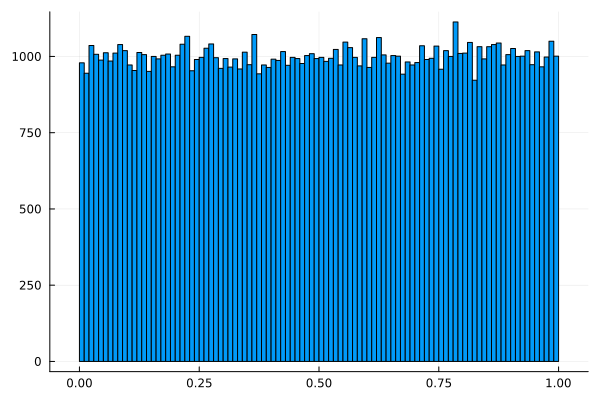

In [8]:
using Plots

println("Mean: ", mean(selfmade_random))
println("Variance: ", VAR(selfmade_random))
println("Error of the mean: ", ERR(selfmade_random))
histogram(selfmade_random, legend=:false, bins=100)

highly depends on seed:

  0.021885 seconds (399.09 k allocations: 7.619 MiB, 18.77% compilation time)
Mean: 0.5022231054558978
Variance: 33510.89905805145
Error of the mean: 0.5788859910038543


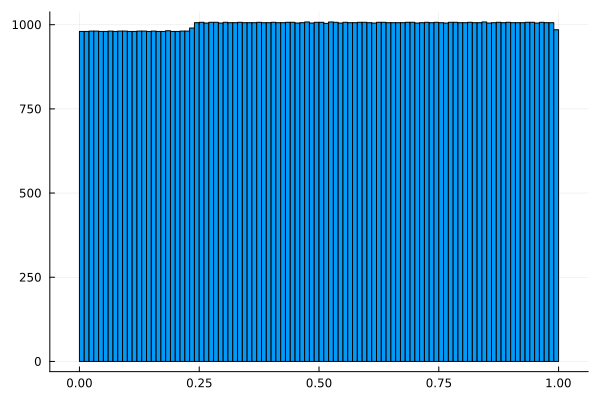

In [86]:
selfmade_random = Array{Float64}(undef, n)

@time for i in 1:n
    selfmade_random[i] = congr_random_number_generator(i)
end

println("Mean: ", mean(selfmade_random))
println("Variance: ", VAR(selfmade_random))
println("Error of the mean: ", ERR(selfmade_random))
histogram(selfmade_random, legend=:false, bins=100)

Exercise 2

In [9]:
function circleShape(h,k,r)
    theta = LinRange(0,2*pi, 500)
    return h .+ r*sin.(theta), k .+ r*cos.(theta)
end

circleShape (generic function with 1 method)

In [87]:
using Random
using Plots; gr()

function eval_PI(n::Int)
    inside = 0
    outside = 0
    
    if (n <= 10000)    
        fig = scatter([],ms=1,legend=:false,
        xaxis = ("x", (0,1.2), 0:0.5:10), yaxis = ("y", (0,1.2), 0:0.5:10))
        
        for i in 1:n
            x = congr_random_number_generator(rand(Int))
            y = congr_random_number_generator(rand(Int))
                    
            if x^2+y^2 <= 1
                scatter!([x],[y],ms=1,legend=:false,
                xaxis = ("x", (0,1.2), 0:0.5:10),
                yaxis = ("y", (0,1.2), 0:0.5:10), mc=:blue, markerstrokewidth=0)
                inside += 1
            else
                scatter!([x],[y],ms=1,legend=:false,
                xaxis = ("x", (0,1.2), 0:0.5:10),
                yaxis = ("y", (0,1.2), 0:0.5:10), mc=:red, markerstrokewidth=0)
                outside += 1
            end
        end
    
        plot!(circleShape(0,0,1), seriestype = [:shape,], lw = 0.5, c =:blue, 
        linecolor= :black, legend = :false, fillalpha= 0.2, aspec_ratio = 1, 
        xaxis = ("x", (0,1.2), 0:0.5:10), yaxis = ("y", (0,1.2), 0:0.5:10))
    
        display(fig)
    
    else
        for i in 1:n
            x = congr_random_number_generator(rand(Int))
            y = congr_random_number_generator(rand(Int))
            if x^2+y^2 <= 1
                inside += 1
            else
                outside += 1
            end
        end
    end
    print("Pi = 4*", inside, "/", n, " = ", 4*inside/n)
end

eval_PI (generic function with 1 method)

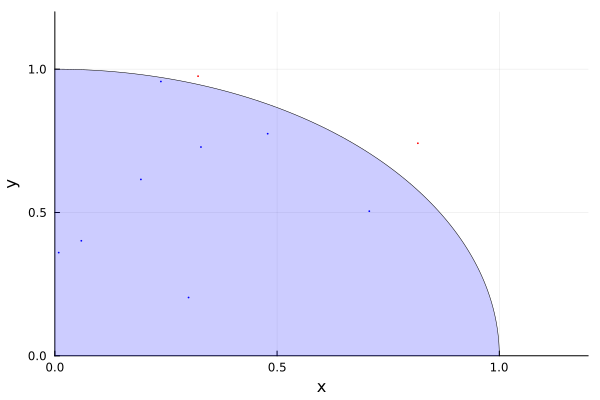

Pi = 4*8/10 = 3.2

In [88]:
eval_PI(10)

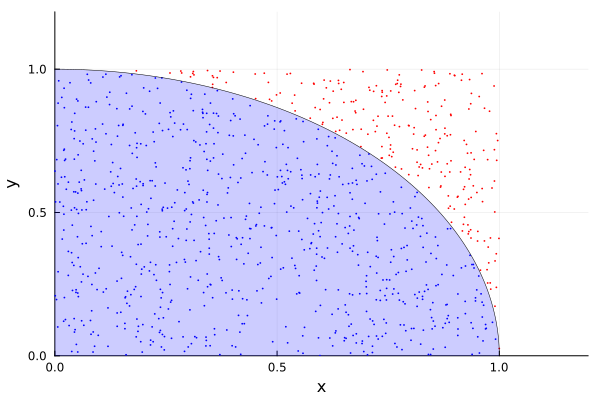

Pi = 4*767/1000 = 3.068

In [89]:
eval_PI(1000)

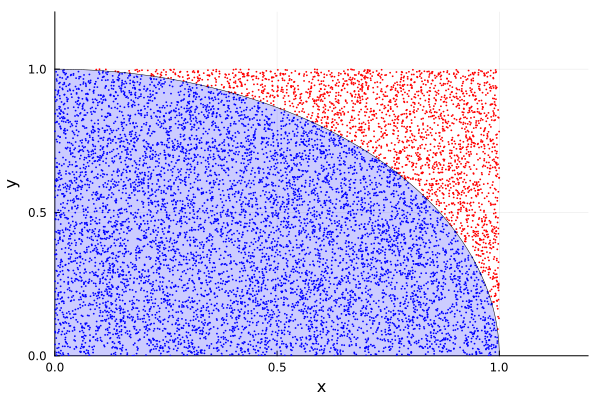

Pi = 4*7850/10000 = 3.14

In [90]:
eval_PI(10000)

In [85]:
eval_PI(10000000000)

Pi = 4*7853987767/10000000000 = 3.1415951068